In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, precision_score


ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
#Baixar dados e separar treino e teste

# Carregar o dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigree", "Age", "Outcome"]
data = pd.read_csv(url, names=col_names)

# Separar features (X) e target (y)
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados (importante para gradiente descendente)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Aplicar customizada  regressão logística 

class CustomLogisticRegression:
    def __init__(self, learning_rate=0.01, n_iter=1000, lambda_param=0.1, regularization='l2', tol=1e-4):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.lambda_param = lambda_param
        self.regularization = regularization
        self.tol = tol  # Critério de parada
        self.weights = None
        self.bias = None
        self.loss_history = []

    def sigmoid_function(self, z):
        """Calcula a função sigmoide para vetor z."""
        return 1 / (1 + np.exp(-z))

    def cost_fn(self, X, y):
        """Calcula a função de custo com regularização L1 ou L2."""
        m = X.shape[0]
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid_function(z)
        
        # Log loss
        cost = -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
        
        # Adiciona regularização
        if self.regularization == 'l2':
            reg_term = (self.lambda_param / (2 * m)) * np.sum(self.weights ** 2)
        elif self.regularization == 'l1':
            reg_term = (self.lambda_param / m) * np.sum(np.abs(self.weights))
        else:
            reg_term = 0
        
        return cost + reg_term

    def gradients(self, X, y):
        """Calcula os gradientes da função de custo (com regularização)."""
        m = X.shape[0]
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid_function(z)
        
        # Gradientes básicos
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)
        
        # Adiciona regularização
        if self.regularization == 'l2':
            dw += (self.lambda_param / m) * self.weights
        elif self.regularization == 'l1':
            dw += (self.lambda_param / m) * np.sign(self.weights)
        
        return dw, db

    def descent(self, X, y):
        """Executa o gradiente descendente com critério de parada."""
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0
        
        for i in range(self.n_iter):
            dw, db = self.gradients(X, y)
            
            # Atualiza parâmetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Armazena o custo para monitoramento
            current_loss = self.cost_fn(X, y)
            self.loss_history.append(current_loss)
            
            # Critério de parada por convergência
            if i > 0 and abs(self.loss_history[-1] - self.loss_history[-2]) < self.tol:
                print(f"Convergência alcançada na iteração {i}!")
                break

    def predict(self, X, threshold=0.5):
        """Faz previsões (0 ou 1) com base no threshold."""
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid_function(z)
        return (y_pred >= threshold).astype(int)

In [ ]:
#Versão do Sklearn LogisticRegression

# Modelo sklearn (com regularização L2 por padrão)
sklearn_model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000)
sklearn_model.fit(X_train, y_train)
sklearn_preds = sklearn_model.predict(X_test)

# Comparar acurácias
custom_accuracy = accuracy_score(y_test, custom_preds)
sklearn_accuracy = accuracy_score(y_test, sklearn_preds)

print(f"Acurácia (Custom): {custom_accuracy:.4f}")
print(f"Acurácia (Sklearn): {sklearn_accuracy:.4f}")

Acurácia (Custom): 0.7338
Acurácia (Sklearn): 0.7532


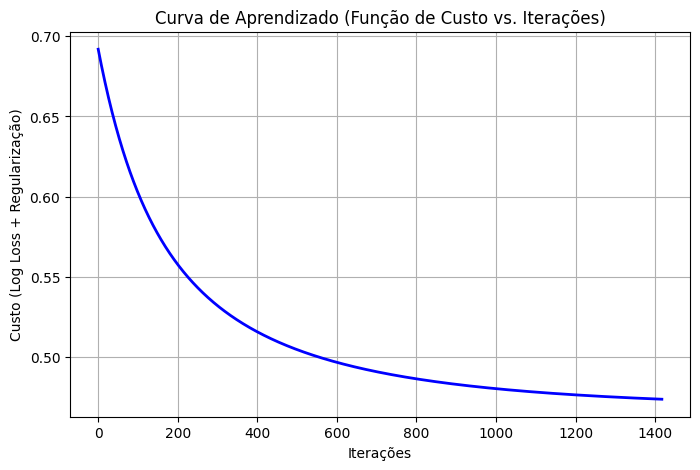

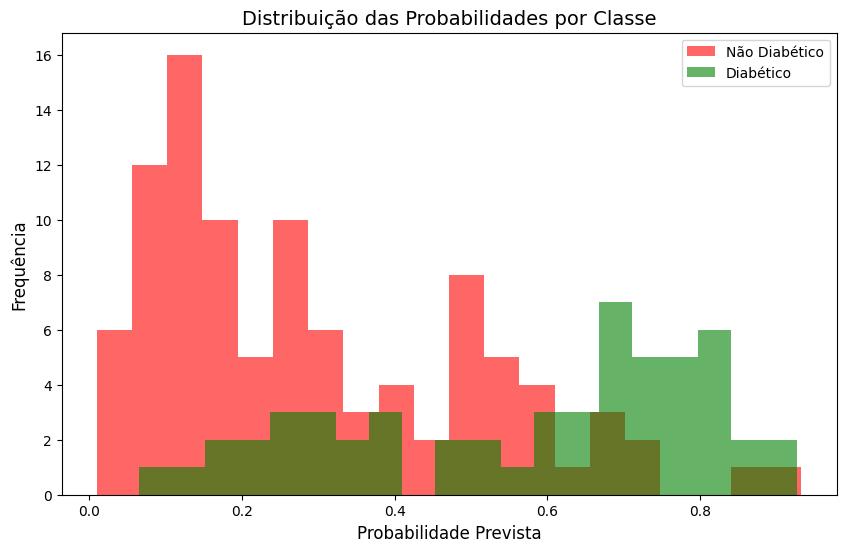

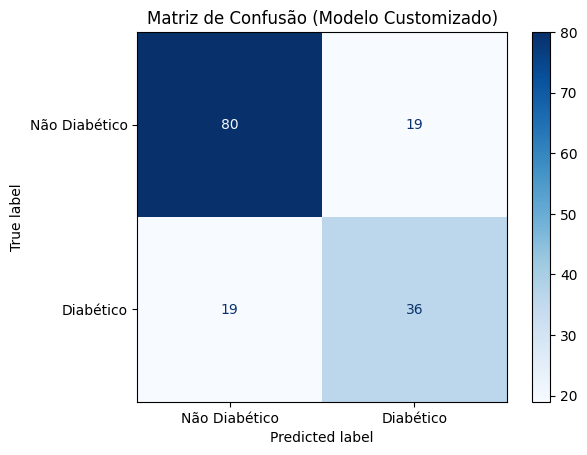

Convergência alcançada na iteração 471!


NameError: name 'plot_decision_regions' is not defined

<Figure size 800x600 with 0 Axes>

In [ ]:
#Visualizar dados do modelo custom

# Plotar histórico de custo
plt.figure(figsize=(8, 5))
plt.plot(model.loss_history, color='blue', linewidth=2)
plt.title("Curva de Aprendizado (Função de Custo vs. Iterações)")
plt.xlabel("Iterações")
plt.ylabel("Custo (Log Loss + Regularização)")
plt.grid(True)
plt.show()

# Calcular probabilidades no conjunto de teste
z = np.dot(X_test, model.weights) + model.bias
y_probs = model.sigmoid_function(z)

# Plotar histogramas
plt.figure(figsize=(10, 6))
plt.hist(y_probs[y_test == 0], bins=20, alpha=0.6, label="Não Diabético", color="red")
plt.hist(y_probs[y_test == 1], bins=20, alpha=0.6, label="Diabético", color="green")
plt.xlabel("Probabilidade Prevista", fontsize=12)
plt.ylabel("Frequência", fontsize=12)
plt.title("Distribuição das Probabilidades por Classe", fontsize=14)
plt.legend()
plt.show()


y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Não Diabético", "Diabético"])
disp.plot(cmap="Blues")
plt.title("Matriz de Confusão (Modelo Customizado)")
plt.show()

# Selecionar 2 features (ex: Glucose e BMI)
X_2d = X_test[:, [1, 5]]  # Índices das features no array

# Treinar um novo modelo só com 2 features (para visualização)
model_2d = CustomLogisticRegression(learning_rate=0.01, n_iter=1000)
model_2d.descent(X_train[:, [1, 5]], y_train)

# Plotar superfície de decisão
plt.figure(figsize=(8, 6))
plot_decision_regions(X_2d, y_test, clf=model_2d, legend=2)
plt.xlabel("Glucose (normalizada)")
plt.ylabel("BMI (normalizada)")
plt.title("Superfície de Decisão (Custom Model)")
plt.show()



metrics = {
    "Acurácia": accuracy_score(y_test, y_pred),
    "Precisão": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-Score": f1_score(y_test, y_pred)
}

pd.DataFrame(metrics, index=["Modelo Customizado"])

Analisar


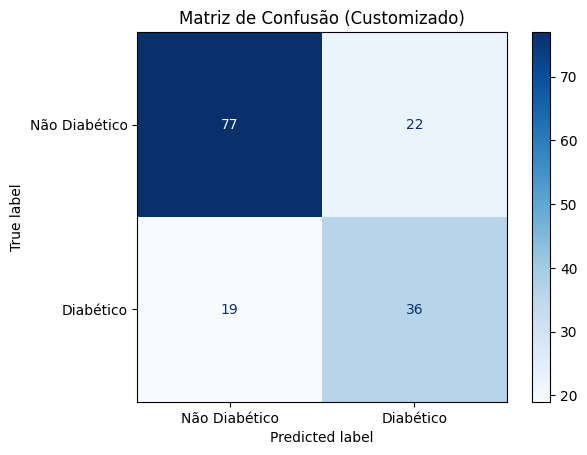

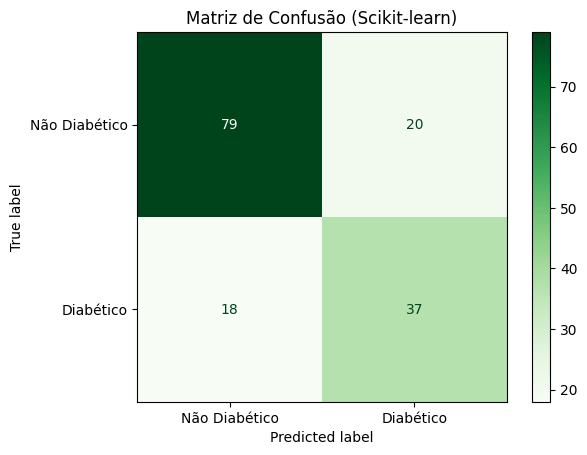

In [ ]:
#Matriz de confusão comparação 

# Matriz de confusão para o modelo customizado
cm_custom = confusion_matrix(y_test, custom_preds)
disp_custom = ConfusionMatrixDisplay(confusion_matrix=cm_custom, display_labels=["Não Diabético", "Diabético"])
disp_custom.plot(cmap="Blues")
plt.title("Matriz de Confusão (Customizado)")
plt.show()

# Matriz de confusão para o scikit-learn
cm_sklearn = confusion_matrix(y_test, sklearn_preds)
disp_sklearn = ConfusionMatrixDisplay(confusion_matrix=cm_sklearn, display_labels=["Não Diabético", "Diabético"])
disp_sklearn.plot(cmap="Greens")
plt.title("Matriz de Confusão (Scikit-learn)")
plt.show()

#dIFERENÇA MÍNIMAS ENTRE POSITIVOS E FALSOS POSITIVOS

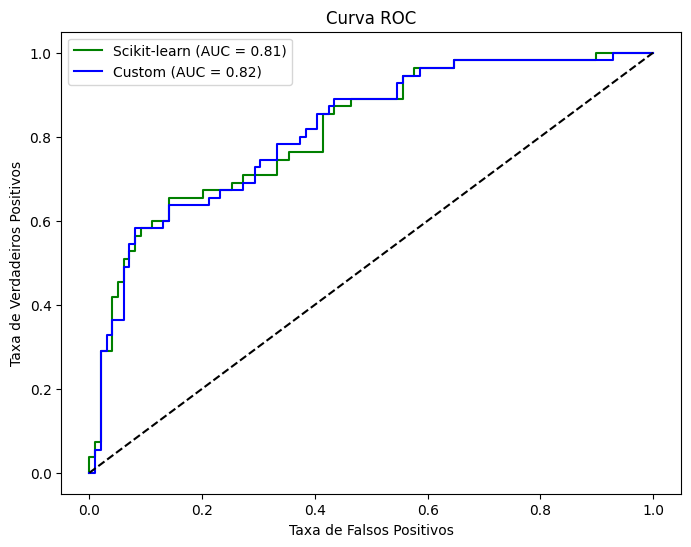

In [ ]:
#Curva ROC e AUC

# Probabilidades previstas (scikit-learn já retorna probabilidades)
y_probs_sklearn = sklearn_model.predict_proba(X_test)[:, 1]
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_probs_sklearn)
auc_sklearn = roc_auc_score(y_test, y_probs_sklearn)

# Probabilidades do modelo customizado (precisamos calculá-las)
linear_model_custom = np.dot(X_test, custom_model.weights) + custom_model.bias
y_probs_custom = 1 / (1 + np.exp(-linear_model_custom))
fpr_custom, tpr_custom, _ = roc_curve(y_test, y_probs_custom)
auc_custom = roc_auc_score(y_test, y_probs_custom)

# Plotar as curvas ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_sklearn, tpr_sklearn, label=f"Scikit-learn (AUC = {auc_sklearn:.2f})", color="green")
plt.plot(fpr_custom, tpr_custom, label=f"Custom (AUC = {auc_custom:.2f})", color="blue")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("Taxa de Falsos Positivos")
plt.ylabel("Taxa de Verdadeiros Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

#QUANTO MAIS PRÓXIMO DE 1 MELHOR

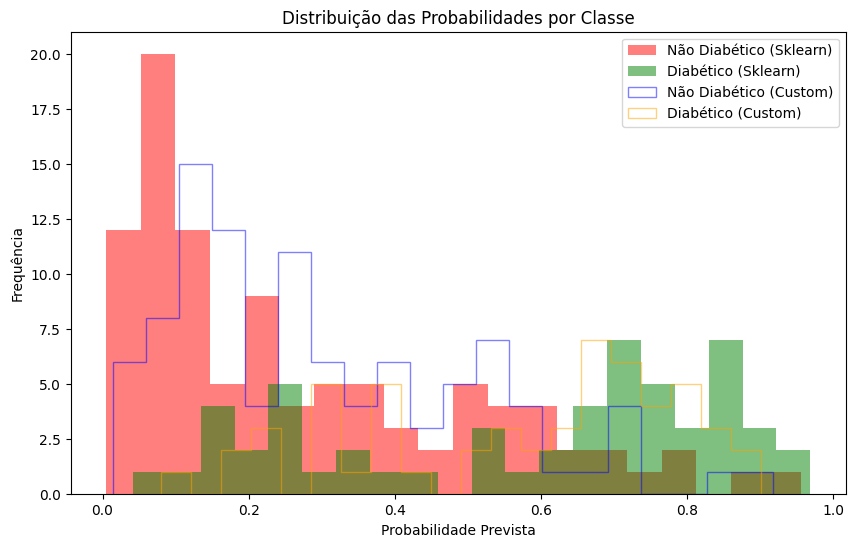

In [ ]:
#Distribuição de probabilidade 
plt.figure(figsize=(10, 6))

# Histograma para scikit-learn
plt.hist(y_probs_sklearn[y_test == 0], bins=20, alpha=0.5, label="Não Diabético (Sklearn)", color="red")
plt.hist(y_probs_sklearn[y_test == 1], bins=20, alpha=0.5, label="Diabético (Sklearn)", color="green")

# Histograma para modelo customizado
plt.hist(y_probs_custom[y_test == 0], bins=20, alpha=0.5, label="Não Diabético (Custom)", color="blue", histtype="step")
plt.hist(y_probs_custom[y_test == 1], bins=20, alpha=0.5, label="Diabético (Custom)", color="orange", histtype="step")

plt.xlabel("Probabilidade Prevista")
plt.ylabel("Frequência")
plt.title("Distribuição das Probabilidades por Classe")
plt.legend()
plt.show()

In [ ]:
#Metricas gerais, F1, recall, precisão, acurácia 

# Calcular métricas para o modelo customizado
precision_custom = precision_score(y_test, custom_preds)
recall_custom = recall_score(y_test, custom_preds)
f1_custom = f1_score(y_test, custom_preds)

# Calcular métricas para scikit-learn
precision_sklearn = precision_score(y_test, sklearn_preds)
recall_sklearn = recall_score(y_test, sklearn_preds)
f1_sklearn = f1_score(y_test, sklearn_preds)

# Criar tabela
metrics_df = pd.DataFrame({
    "Modelo": ["Customizado", "Scikit-learn"],
    "Acurácia": [custom_accuracy, sklearn_accuracy],
    "Precisão": [precision_custom, precision_sklearn],
    "Recall": [recall_custom, recall_sklearn],
    "F1-Score": [f1_custom, f1_sklearn],
    "AUC": [auc_custom, auc_sklearn]
})

print(metrics_df)

         Modelo  Acurácia  Precisão    Recall  F1-Score       AUC
0   Customizado  0.733766  0.620690  0.654545  0.637168  0.815427
1  Scikit-learn  0.753247  0.649123  0.672727  0.660714  0.814692


O modelo customizado e a regressão do SKT foram muito parecidos, não deixando muita diferença entre ambos, todavia, o modelo customizado permite trabalhar um pouco mais com detalhes.